In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"niyatimishra08","key":"604394c21b6c640c9d3b22c361237c36"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
anandshaw2001/netflix-movies-and-tv-shows                      Netflix Movies and TV Shows                        1MB  2025-01-03 10:33:01           3200         92  1.0              
solomonameh/spotify-music-dataset                              Spotify Music Dataset                            573KB  2025-01-07 06:51:01           1312         27  0.9411765        
preetigupta004/cancer-issue                                    Cancer issue                                     297KB  2025-01-11 09:57:24            970         22  1.0              
stealthtechnologies/predict-student-performance-dataset        Predict Student P

In [9]:
!kaggle competitions download -c induction-task

 97% 195M/201M [00:02<00:00, 97.8MB/s]
100% 201M/201M [00:02<00:00, 93.8MB/s]


In [10]:
! mkdir train
! unzip induction-task.zip -d train

mkdir: cannot create directory ‘train’: File exists
Archive:  induction-task.zip
  inflating: train/Data/Test/image_1.jpg  
  inflating: train/Data/Test/image_10.jpg  
  inflating: train/Data/Test/image_100.jpg  
  inflating: train/Data/Test/image_101.jpg  
  inflating: train/Data/Test/image_102.jpg  
  inflating: train/Data/Test/image_103.jpg  
  inflating: train/Data/Test/image_104.jpg  
  inflating: train/Data/Test/image_105.jpg  
  inflating: train/Data/Test/image_106.jpg  
  inflating: train/Data/Test/image_107.jpg  
  inflating: train/Data/Test/image_108.jpg  
  inflating: train/Data/Test/image_109.jpg  
  inflating: train/Data/Test/image_11.jpg  
  inflating: train/Data/Test/image_110.jpg  
  inflating: train/Data/Test/image_111.jpg  
  inflating: train/Data/Test/image_112.jpg  
  inflating: train/Data/Test/image_113.jpg  
  inflating: train/Data/Test/image_114.jpg  
  inflating: train/Data/Test/image_115.jpg  
  inflating: train/Data/Test/image_116.jpg  
  inflating: train/Data

In [11]:
!pip install keras-preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [12]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.applications import MobileNetV2, ResNet152, VGG16, EfficientNetB0, InceptionV3
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
import os
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, target_size=(236, 236))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(features.shape[0], 236, 236, 3)
    return features

TRAIN_DIR = "/content/train/Data/Train"

train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

train_features = extract_features(train['image'])

x_train = train_features / 255.0

le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_train = to_categorical(y_train, num_classes=2)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(236, 236, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.3))

# Output layer
model.add(Dense(2, activation='softmax'))

from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_val, y_val),
    batch_size=16,
    epochs=25,
    callbacks=[early_stopping]
)


#history = model.fit(
#    x=x_train,
#    y=y_train,
#    validation_data=(x_val, y_val),
#    batch_size=16,
#    epochs=20
#)

Real completed
AI completed


  0%|          | 0/801 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.6516 - loss: 0.6156 - val_accuracy: 0.9379 - val_loss: 0.2715
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 79s 984ms/step - accuracy: 0.9291 - loss: 0.2348 - val_accuracy: 0.9938 - val_loss: 0.1027
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 993ms/step - accuracy: 0.9604 - loss: 0.1250 - val_accuracy: 0.9938 - val_loss: 0.0492
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 998ms/step - accuracy: 0.9848 - loss: 0.0666 - val_accuracy: 0.9938 - val_loss: 0.0421
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9787 - loss: 0.0558 - val_accuracy: 1.0000 - val_loss: 0.0202
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9951 - loss: 0.0328 - val_accuracy: 1.0000 - val_loss: 0.0157
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9992 - loss: 0.0185 - val_accuracy: 0.9938 - val_loss: 0.0163
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9978 - loss: 0.0131 - val_accuracy: 1.0000 - 

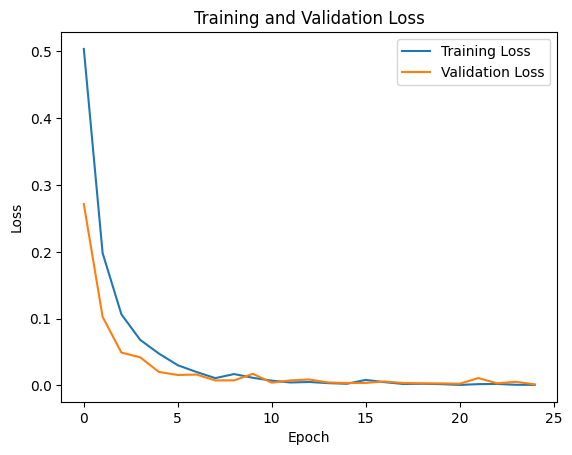

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [19]:
model.save("model_aivsreal.h5")

In [16]:
!kaggle competitions download -c induction-task-2025

induction-task-2025.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
! mkdir train2
! unzip induction-task-2025.zip -d train2

Archive:  induction-task-2025.zip
  inflating: train2/Test_Images/image_0.jpg  
  inflating: train2/Test_Images/image_1.jpg  
  inflating: train2/Test_Images/image_10.jpg  
  inflating: train2/Test_Images/image_100.jpg  
  inflating: train2/Test_Images/image_101.jpg  
  inflating: train2/Test_Images/image_102.jpg  
  inflating: train2/Test_Images/image_103.jpg  
  inflating: train2/Test_Images/image_104.jpg  
  inflating: train2/Test_Images/image_105.jpg  
  inflating: train2/Test_Images/image_106.jpg  
  inflating: train2/Test_Images/image_107.jpg  
  inflating: train2/Test_Images/image_108.jpg  
  inflating: train2/Test_Images/image_109.jpg  
  inflating: train2/Test_Images/image_11.jpg  
  inflating: train2/Test_Images/image_110.jpg  
  inflating: train2/Test_Images/image_111.jpg  
  inflating: train2/Test_Images/image_112.jpg  
  inflating: train2/Test_Images/image_113.jpg  
  inflating: train2/Test_Images/image_114.jpg  
  inflating: train2/Test_Images/image_115.jpg  
  inflating:

In [18]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img

TEST_DIR = "/content/train2/Test_Images"

def create_test_dataframe(dir):
    image_paths = []
    for imagename in os.listdir(dir):
        image_paths.append(os.path.join(dir, imagename))
    return image_paths

def extract_test_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, target_size=(236, 236))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 236, 236, 3)
    return features

test = pd.DataFrame()
test['image'] = create_test_dataframe(TEST_DIR)
test_features = extract_test_features(test['image'])
x_test = test_features / 255.0

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = le.inverse_transform(predicted_labels)

image_ids = [img.split('/')[-1] for img in test['image']]

results = pd.DataFrame({'Id': image_ids, 'Label': predicted_labels})
results.to_csv('submission.csv', index=False)

  0%|          | 0/200 [00:00<?, ?it/s]

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 434ms/step


In [ ]:
# prompt: '/content/train/Data/Test/.ipynb_checkpoints' remove

import shutil
import os

# Define the directory to remove
dir_to_remove = '/content/train/Data/Test/.ipynb_checkpoints'

# Check if the directory exists
if os.path.exists(dir_to_remove):
    try:
        # Use shutil.rmtree to remove the directory and its contents
        shutil.rmtree(dir_to_remove)
        print(f"Directory '{dir_to_remove}' and its contents removed successfully.")
    except OSError as e:
        print(f"Error removing directory '{dir_to_remove}': {e}")
else:
    print(f"Directory '{dir_to_remove}' does not exist.")

Directory '/content/train/Data/Test/.ipynb_checkpoints' and its contents removed successfully.
